In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [2]:
import pandas as pd
from ShotMaps import shot_data
from Data.Understat_Data import scrape_match_shots
from mplsoccer import Pitch
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Get and handle data

In [3]:
sd = scrape_match_shots(23092)

shotdata = shot_data(sd, data_source='Understat')
print(shotdata)

shot_data object of Understat of shape (29, 7).


In [4]:
rescaled_data = shotdata.rescale_shot_data()
rescaled_data

(             x          y    xG  minute              team  \
 0   117.360004  28.400000  0.06       1     Bayern Munich   
 1   106.200000  50.479999  0.09       2     Bayern Munich   
 2   117.239996  35.760001  0.45       6     Bayern Munich   
 3    99.119998  37.760001  0.07      10     Bayern Munich   
 4   108.719998  44.079999  0.04      34     Bayern Munich   
 5   113.160004  50.320001  0.09      34     Bayern Munich   
 6    93.600000  40.239999  0.03      42     Bayern Munich   
 7   104.519998  35.839999  0.07      42     Bayern Munich   
 8   110.039996  34.160001  0.10      43     Bayern Munich   
 9   112.919998  24.159998  0.30      44     Bayern Munich   
 10   94.439996  34.639999  0.03      45     Bayern Munich   
 11  111.719998  43.120001  0.33      45     Bayern Munich   
 12   90.600000  51.439999  0.01      51     Bayern Munich   
 13  110.160004  37.760001  0.49      56     Bayern Munich   
 14  110.400000  45.200000  0.08      65     Bayern Munich   
 15  110

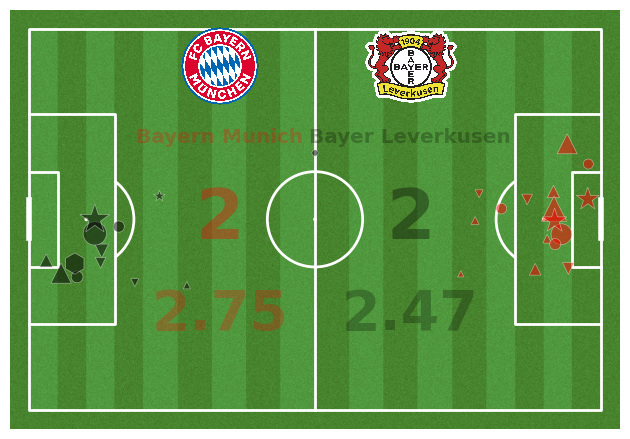

In [5]:
shotdata.static_shotmap(color1='red', color2='black', home_image ='bay.png', away_image='bay04.png')

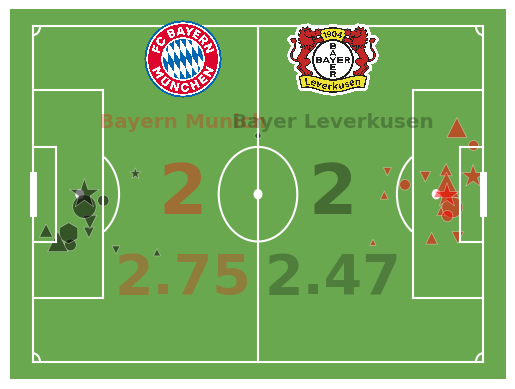

In [6]:
shotdata.static_shotmap(pitch_type='myPitch',  color1='red', color2='black', home_image ='bay.png', away_image='bay04.png',
                        )

In [7]:
A = (1, 2)
max(A)

2